<a href="https://colab.research.google.com/github/ArtemBaron/baron_vergeles/blob/main/2023_06_19_Baron_A_A_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 18GQ-VBjDrZpr2QL_t3L78ZKW3ZI6u0rM
! gdown --id 1-GzwmcGPCLRxIN2FplmsFSvE0p9Ephtx

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18GQ-VBjDrZpr2QL_t3L78ZKW3ZI6u0rM
To: /content/input.csv
100% 13.6k/13.6k [00:00<00:00, 42.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-GzwmcGPCLRxIN2FplmsFSvE0p9Ephtx
To: /content/target.csv
100% 795/795 [00:00<00:00, 4.23MB/s]


**1. Загрузка файла в colab**


Input:
https://drive.google.com/file/d/`18GQ-VBjDrZpr2QL_t3L78ZKW3ZI6u0rM`/view?usp=sharing

  Target:
https://drive.google.com/file/d/1-GzwmcGPCLRxIN2FplmsFSvE0p9Ephtx/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
input = pd.read_csv('/content/input.csv')
target = pd.read_csv('/content/target.csv')

**2. EDA (1)**
 - 149 наблюдений;
 - есть пропуски в переменных Х, но в у нет пропусков;
 - объединение двух таблиц в одну по общему id. Курсив

In [ ]:
input.head()

,id,x1,x2,x3,x4,x5
0,0,1.262417,1.088818,1.373445,0.538688,1.504517
1,1,0.961841,0.989835,0.409111,0.101004,1.367743
2,2,1.142187,NaN,1.315001,0.437684,1.276560
3,3,1.082072,1.220796,0.438334,0.067336,1.686883
4,4,1.522915,0.989835,1.928668,0.707028,1.367743


In [ ]:
target.head()

,id,y
0,0,1
1,1,0
2,2,1
3,3,0
4,4,2


In [ ]:
target[['id']].max()

id    149
dtype: int64

In [ ]:
input[['id']].max()

id    149
dtype: int64

In [ ]:
target.isna().mean().sort_values(ascending = False)

id    0.0
y     0.0
dtype: float64

In [ ]:
input.isna().mean().sort_values(ascending = False)

x3    0.120000
x4    0.106667
x2    0.093333
x1    0.080000
id    0.000000
x5    0.000000
dtype: float64

Проанализировав доли пропусков для каждой переменной в двух таблицах: пропусков в id нет, можно совместить таблицы.

In [ ]:
df = target.merge(input, how = 'left', on = 'id')
df.index = df['id']
df.drop('id', axis = 1, inplace = True)
df.head()

,y,x1,x2,x3,x4,x5
id,,,,,,
0,1,1.262417,1.088818,1.373445,0.538688,1.504517
1,0,0.961841,0.989835,0.409111,0.101004,1.367743
2,1,1.142187,NaN,1.315001,0.437684,1.276560
3,0,1.082072,1.220796,0.438334,0.067336,1.686883
4,2,1.522915,0.989835,1.928668,0.707028,1.367743


In [ ]:
len(df) == len(input) == len(target)


True

проверка, что не потерял наблюдения

**3. EDA (2)**
 - выявление пропусков;
 - заполнение пропусков;

In [ ]:
def count_missing(x):
  return x.isna().sum()
#функция для подсчета пропусков
#count_missing(df[df['y']==0])

In [ ]:
for i in range(3):
  print(df[df['y']==i].isna().mean().sort_values(ascending=False))

x2    0.14
x4    0.08
x3    0.06
x1    0.04
y     0.00
x5    0.00
dtype: float64
x3    0.12
x4    0.12
x1    0.10
x2    0.06
y     0.00
x5    0.00
dtype: float64
x3    0.18
x4    0.12
x1    0.10
x2    0.08
y     0.00
x5    0.00
dtype: float64


Пропуски в переменных распределены примерно равномерно для разных значений У.

In [ ]:
t = df.groupby('y', dropna = False)[['x1', 'x2', 'x3', 'x4', 'x5']].agg(['count', 'median', 'mean', 'min', 'max', count_missing])
t.reset_index()
pd.set_option('display.max_columns', None)
t.columns = ['_'.join(i).strip() for i in t.columns.values]
t

,x1_count,x1_median,x1_mean,x1_min,x1_max,x1_count_missing,x2_count,x2_median,x2_mean,x2_min,x2_max,x2_count_missing,x3_count,x3_median,x3_mean,x3_min,x3_max,x3_count_missing,x4_count,x4_median,x4_mean,x4_min,x4_max,x4_count_missing,x5_count,x5_median,x5_mean,x5_min,x5_max,x5_count_missing
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,48,1.001918,1.003588,0.86165,1.162225,2,43,1.121813,1.121813,0.758873,1.451758,7,47,0.438334,9.743442,0.292222,438.333658,3,46,0.067336,2.275519,0.033668,67.336030,4,50,1.550108,1.558315,1.048603,2.006023,0
1,45,1.182263,1.188052,0.98188,1.402685,5,47,0.923846,0.921038,0.659890,1.121813,3,44,1.271168,28.443205,0.876667,1198.111998,6,44,0.437684,0.449927,0.336680,0.606024,6,50,1.276560,1.262882,0.911828,1.550108,0
2,45,1.302494,1.324313,0.98188,1.583031,5,46,0.989835,0.981228,0.725879,1.253791,4,41,1.607223,50.751197,1.315001,2016.334825,9,44,0.673360,16.732238,0.471352,707.028314,6,50,1.367743,1.355889,1.003011,1.732474,0



*   x1 - переменная распределенна от 0.86 до 1.58, больше для больших значений У;

*   x2 - переменная распределенна от 0.66 до 1.45, можно сказать что для У = 0 значение х2 наибольшее, а для У = 1 - наименьшее;

*   x3 - переменная распределенна от 0.3 до 2016, больше для больших значений У, видно что переменная имеет экстремальные значения (высокое среднее и максимальное, при низкой медиане)

*   x4 - переменная распределенна от 0.03 до 707, больше для больших значений У, видно что переменная имеет экстремальные значений для У = 0 и 2(высокое среднее и максимальное, при низкой медиане)

*   x5 - переменная распределенна от 0.91 до 2, можно сказать что для У = 0 значение х2 наибольшее, а для У = 1 - наименьшее; пропусков в переменной х5 нет.





**4. EDA (3)**
 - выявление outliers;

Text(0.5, 1.0, 'Outliers независимых переменных')

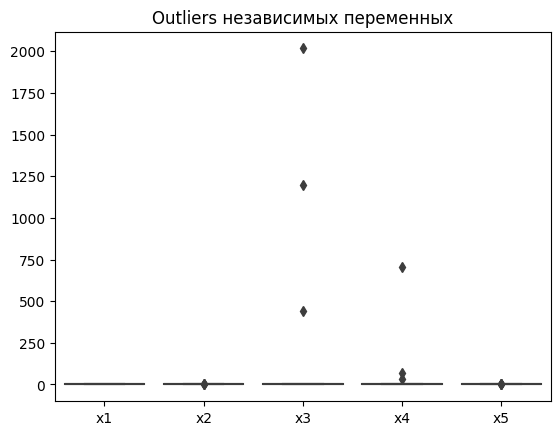

In [ ]:
#df['x3'].plot(kind='box',
#                   title='Распределение x3', grid=True)
sns.boxplot(data=df[['x1', 'x2', 'x3', 'x4', 'x5']]).set_title("Outliers независимых переменных")

На графике выше видим, есть сильные outliers в переменных х3 и х4

Text(0.5, 1.0, 'Outliers в переменных х2 и х5')

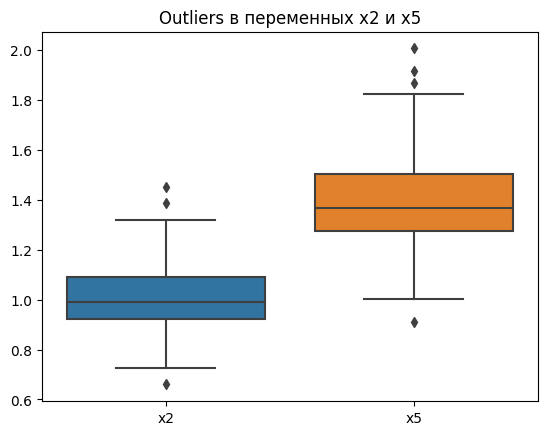

In [ ]:
#df['x2'].plot(kind='box',
 #                  title='Распределение x2', grid=True)
sns.boxplot(data=df[['x2', 'x5']]).set_title("Outliers в переменных х2 и х5")



*   По графикам видим по три outlier в переменных х3, х4
*   Также график показывает 3 и 4 outlier в переменных х2 и х5, но это не выглядит существенным отклонением, поэтому их лучше оставить
*   Стоит убрать выбросы и взглянуть на метрики еще раз, чтобы их использовать для заполнения пропуска в даннах



In [ ]:
q1 = df['x3'].quantile(0.25)
q3 = df['x3'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[~(df['x3'].between(lower_bound, upper_bound, inclusive=True)) & (df['x3'].isna() == False)]
remove_outliers

,y,x1,x2,x3,x4,x5
id,,,,,,
59,1,1.162225,0.890851,1198.111998,0.336680,1.230968
83,0,1.062033,1.220796,438.333658,0.067336,1.686883
88,2,1.542954,0.857857,2016.334825,NaN,1.185377


In [ ]:
def remove_outliers(df):
  columns = ['x3', 'x4']
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df.drop(index = df[~(df[col].between(lower_bound, upper_bound, inclusive=True)) & (df[col].isna() == False)].index.values)
  return df

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Функция remove_outliers убирает для переменных х3 и х4 outleirs.
Note: поставил условие на NA, чтобы функция не убирала строки где пропущены значения

In [ ]:
df_without_outliers = remove_outliers(df)
df_without_outliers

,y,x1,x2,x3,x4,x5
id,,,,,,
0,1,1.262417,1.088818,1.373445,0.538688,1.504517
1,0,0.961841,0.989835,0.409111,0.101004,1.367743
2,1,1.142187,NaN,1.315001,0.437684,1.276560
3,0,1.082072,1.220796,0.438334,0.067336,1.686883
4,2,1.522915,0.989835,1.928668,0.707028,1.367743
...,...,...,...,...,...,...
145,1,1.102110,0.791868,1.110445,0.370348,1.094194
146,2,1.342570,1.088818,NaN,0.707028,1.504517
147,0,1.102110,1.154807,0.379889,0.067336,1.595700


In [ ]:
t = df_without_outliers.groupby('y', dropna = False)[['x1', 'x2', 'x3', 'x4', 'x5']].agg(['count', 'median', 'mean', 'min', 'max', count_missing])
t.reset_index()
t.columns = ['_'.join(i).strip() for i in t.columns.values]
t

,x1_count,x1_median,x1_mean,x1_min,x1_max,x1_count_missing,x2_count,x2_median,x2_mean,x2_min,x2_max,x2_count_missing,x3_count,x3_median,x3_mean,x3_min,x3_max,x3_count_missing,x4_count,x4_median,x4_mean,x4_min,x4_max,x4_count_missing,x5_count,x5_median,x5_mean,x5_min,x5_max,x5_count_missing
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,45,1.001918,1.001027,0.86165,1.162225,2,41,1.121813,1.121813,0.758873,1.451758,6,44,0.409111,0.424387,0.292222,0.555223,3,43,0.067336,0.083779,0.033668,0.202008,4,47,1.550108,1.558839,1.048603,2.006023,0
1,44,1.182263,1.188639,0.98188,1.402685,5,46,0.940343,0.921694,0.659890,1.121813,3,43,1.256556,1.241606,0.876667,1.461112,6,43,0.437684,0.452561,0.336680,0.606024,6,49,1.276560,1.263534,0.911828,1.550108,0
2,43,1.302494,1.320202,0.98188,1.583031,5,44,0.989835,0.985336,0.725879,1.253791,4,39,1.607223,1.610970,1.315001,1.957890,9,43,0.673360,0.678841,0.471352,0.841700,5,48,1.367743,1.361094,1.003011,1.732474,0



*   x1 - переменная распределенна от 0.86 до 1.58, больше для больших значений У;

*   x2 - переменная распределенна от 0.66 до 1.32, можно сказать что для У = 0 значение х2 наибольшее, а для У = 1 - наименьшее;

*   x3 - переменная распределенна от 0.3 до 1.96, больше для больших значений У

*   x4 - переменная распределенна от 0.03 до 0,84, больше для больших значений У

*   x5 - переменная распределенна от 0.91 до 2, пропусков в переменной х5 нет.

**5. EDA (4)**
 - заполнение пропусков;



посмотрим на распределение каждой переменной для разных значений в классе У

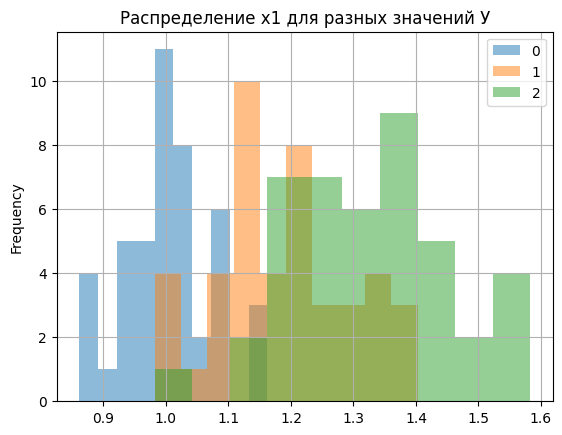

In [ ]:
df_without_outliers.groupby('y')['x1'].plot(kind='hist', alpha = 0.5,title='Распределение x1 для разных значений У', grid = True)
plt.legend(loc='upper right')


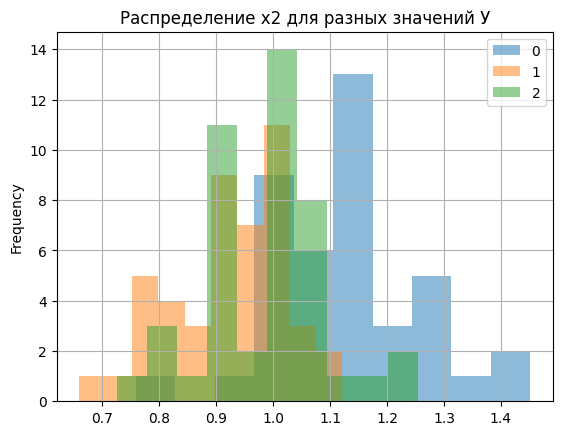

In [ ]:
df_without_outliers.groupby('y')['x2'].plot(kind='hist', alpha = 0.5,title='Распределение x2 для разных значений У', grid = True)
plt.legend(loc='upper right')

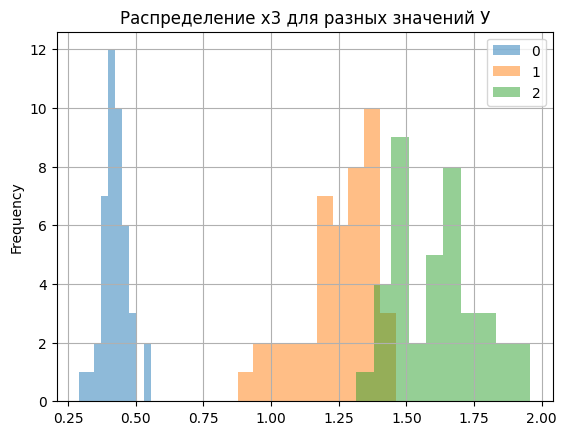

In [ ]:
df_without_outliers.groupby('y')['x3'].plot(kind='hist', alpha = 0.5,title='Распределение x3 для разных значений У', grid = True)
plt.legend(loc='upper right')

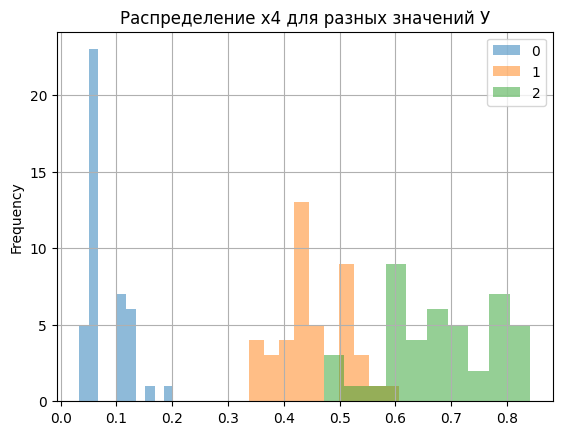

In [ ]:
df_without_outliers.groupby('y')['x4'].plot(kind='hist', alpha = 0.5,title='Распределение x4 для разных значений У', grid = True)
plt.legend(loc='upper right')

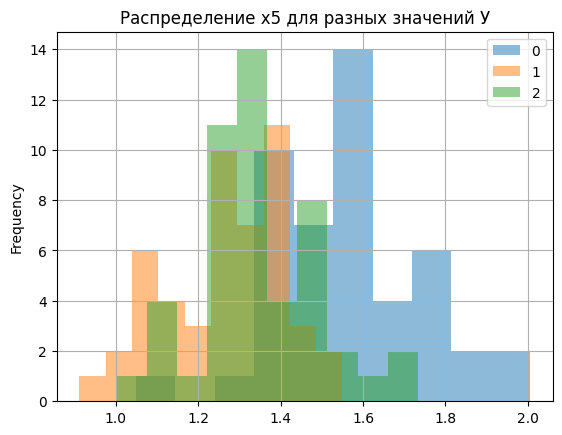

In [ ]:
df_without_outliers.groupby('y')['x5'].plot(kind='hist', alpha = 0.5,title='Распределение x5 для разных значений У', grid = True)
plt.legend(loc='upper right')

In [ ]:
t = df_without_outliers.groupby('y', dropna = False)[['x1', 'x2', 'x3', 'x4', 'x5']].median()
t.reset_index()
t

,x1,x2,x3,x4,x5
y,,,,,
0,1.001918,1.121813,0.409111,0.067336,1.550108
1,1.182263,0.940343,1.256556,0.437684,1.276560
2,1.302494,0.989835,1.607223,0.673360,1.367743


Для заполнения пропусков в данных предлагается взять медианные значения для каждого значения У (можно было и взять среднее, так как после того как убрали outliers, среднее и медиана почти сравнялись).

In [ ]:
df_without_outliers_nan = df_without_outliers.copy()

In [ ]:
def fill_nan(df):
  columns = ['x1', 'x2', 'x3', 'x4', 'x5']
  for col in columns:
    df[col] = df[col].fillna(df.groupby('y')[col].transform('median'))
  return df

In [ ]:
fill_nan(df_without_outliers_nan)

,y,x1,x2,x3,x4,x5
id,,,,,,
0,1,1.262417,1.088818,1.373445,0.538688,1.504517
1,0,0.961841,0.989835,0.409111,0.101004,1.367743
2,1,1.142187,0.940343,1.315001,0.437684,1.276560
3,0,1.082072,1.220796,0.438334,0.067336,1.686883
4,2,1.522915,0.989835,1.928668,0.707028,1.367743
...,...,...,...,...,...,...
145,1,1.102110,0.791868,1.110445,0.370348,1.094194
146,2,1.342570,1.088818,1.607223,0.707028,1.504517
147,0,1.102110,1.154807,0.379889,0.067336,1.595700


In [ ]:
df_without_outliers_nan.isna().mean()

y     0.0
x1    0.0
x2    0.0
x3    0.0
x4    0.0
x5    0.0
dtype: float64

**6. EDA (5)**
 - анализ автокорреляции между переменными;


<Axes: >

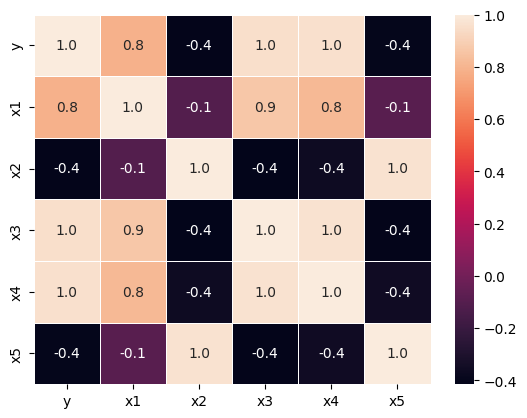

In [ ]:
sns.heatmap(df_without_outliers_nan.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [ ]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


interval columns not set, guessing: ['y', 'x1', 'x2', 'x3', 'x4', 'x5']


<Axes: >

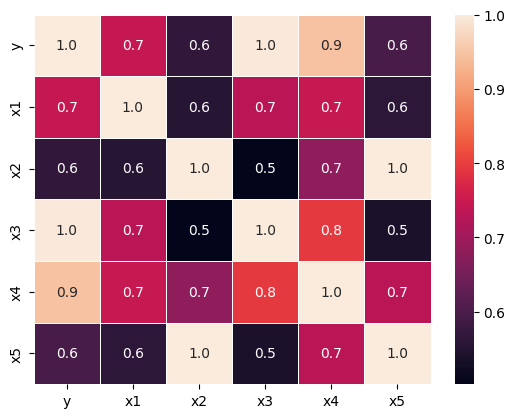

In [ ]:
phik_overview = df_without_outliers.phik_matrix()
sns.heatmap(phik_overview, annot=True, linewidths=.5, fmt= '.1f')


После того как данные были избавлены от outliers и пропусков, можно взглянуть на матрицу корреляций. Выше представлены матрица стандартной корреляции (-1:1) и матрица корреляций Phik (0:1), которая улавливает нелинейную зависимость.



1.   Из матриц видим, что x3 и x4 сильно коррелирует с У
2.   На нашей выборке х3 имеет единичную корреляцию с У
2.   Есть проблема мультиколлинеарности из-за максимальной корреляции между х2 и х5




<Axes: title={'center': 'Корреляция между x2 и x5'}, xlabel='x2', ylabel='x5'>

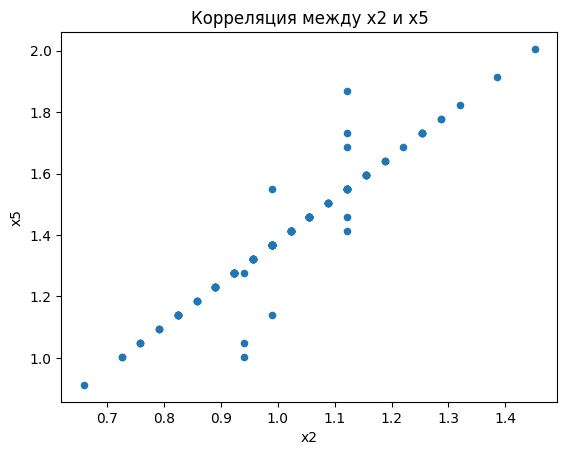

In [ ]:
df_without_outliers_nan.plot(kind = 'scatter', x = 'x2', y = 'x5', title='Корреляция между x2 и x5')


В связи с явной линейной зависимостью х2 и х5, предлагается убрать х2 из модели, так как в ней были пропуски, а в х5 - пропусков не было. Более того, исходя из графиков распределения х2 и х5 для разных значений класса у: переменные х2 и х5 имеют схожее распределение.

In [ ]:
data = df_without_outliers_nan.drop('x2', axis = 1)

<Axes: xlabel='x3', ylabel='x4'>

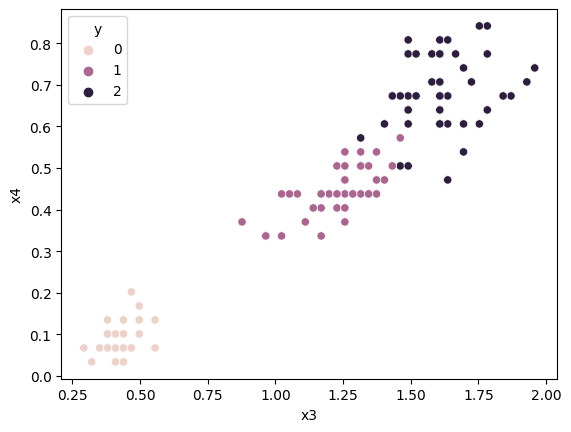

In [ ]:
# визуализируем распределение только по 2 признакам (x3 и х4)
# видим что кластер у = 0 сильнее выделяется, а у кластеров у = 1 и у = 2 граница менее явна
# так как есть область на графике, где на базе значений х3 и х4 нельзя определить значения в у, стоит полагать что другие переменные (х1, х2) должны дать ответы на этот вопрос
sns.scatterplot(data = data, x = 'x3', y = 'x4', hue='y')



*   Визуализируем распределение только по 2 признакам (x3 и х4)
*   Видим что кластер у = 0 сильнее выделяется, а у кластеров у = 1 и у = 2 граница менее явна
*   Так как есть область на графике, где на базе значений х3 и х4 нельзя определить значения в у, стоит полагать что другие переменные (х1, х5) должны объяснять у.









**7. Модели классификации**

*   разделение датасета на 70% обучающей и 30% тестируемой выборки




In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,train_size=0.7,random_state=42,stratify=data['y'])


**Модели предсказания класса У**

**1. Linear discriminant analysis (LDA)**


---




1.   Зависимая переменная принимает 3 класса (0,1,2)
2.   LDA чувствителен к outliers которые мы убрали
3.   LDA ищет линейные комбинации независимых переменных, которыми можно разделить зависимую переменную
4.   Классы сбалансиованы (кол-во наблюдений почти одинаково для разных значений У)






In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучение
lda.fit(train[['x1', 'x5', 'x3', 'x4']], train[['y']])
# делаем прогноз на тестовой выборке
pred = lda.predict(test[['x1', 'x5', 'x3', 'x4']])
# смотрим разницу факта и прогноза
test['lda_pred'] = pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test['y'],test['lda_pred']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44





*   Точность = accuracy = TP+TN/TP+TN+FP+FN: 98%, высокая, модель 98% дает верный результат
*   Полнота = Recall = TP/TP+FN: почти все Positive семплы классифицируются верно (видим что ошибки были только в у=2, где не был выявлен у = 2)
*   Precision = TP/TP+FP: почти все Positive семплы классифицируются верно (видим что ошибки были только в у=1, где был неверно выявлен у = 1)

*   F1 = (2 * recall * *precision)/*(*recall* + *precision*), высокая, средневзвешенное значение точности и полноты (98%)






In [ ]:
#ошибки
test[test['y'] != test['lda_pred']]
#test.loc[test['lda_pred'] != test['y'], 'lda_mistakes'] = 'mistake'
def mistakes(true, pred):
  return pd.Series(['mistake' if true != pred else 'no mistake'])

test['lda_mistakes'] = test.apply(lambda x: mistakes(x['y'], x['lda_pred']), axis=1)

test



,y,x1,x3,x4,x5,lda_pred,lda_mistakes
id,,,,,,,
20,2,1.302494,1.490334,0.673360,1.458926,2,no mistake
13,1,1.182263,1.081223,0.437684,1.094194,1,no mistake
82,0,0.921765,0.409111,0.067336,1.413334,0,no mistake
148,1,1.202302,1.256556,0.538688,1.230968,1,no mistake
54,0,1.001918,0.467556,0.202008,1.595700,0,no mistake
24,1,1.402685,1.373445,0.471352,1.458926,1,no mistake
30,0,1.082072,0.379889,0.134672,1.778066,0,no mistake
66,0,1.001918,0.350667,0.067336,1.458926,0,no mistake
32,2,1.342570,1.607223,0.673360,1.504517,2,no mistake




*   В колонке "lda_mistakes" показаны ошибки модели lDA (1 ошибка)


In [ ]:
lda.coef_

array([[ 30.89453213,  34.18063016, -69.76052697, -79.7658576 ],
       [-10.63822133, -11.01788774,  20.06073967,  13.79278394],
       [-19.93394045, -22.82886703,  49.0918861 ,  65.55511051]])



*   Коэффициенты дискриминатных линии, которые и разделяют датасет на классы




<Axes: xlabel='x3', ylabel='x4'>

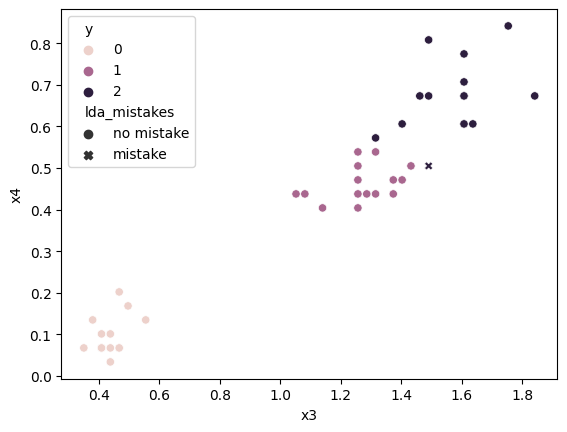

In [ ]:
sns.scatterplot(data = test, x = 'x3', y = 'x4', hue='y', style = 'lda_mistakes')




---



*   Визуализация ошибки модели (lDA), ошибочно был выбран класс 1, а не класс 2.





---



**2. Multiclass logistic regression**


1.   Допустим, что значения зависимой переменной не показывают определенный уровень (плохо-хорошо-отлично, иначе нужна ordered logit)
2.   Логистическая регрессия на выходе дает вероятности выбора того или иного класса
3.   Assumption of IIA (если добавляется новый класс, odds выбора одного класса вместо другого не изменяются.
4.   Модель на выходе дает score: линейную комбинацию зависимых переменных
5.   Вероятность выбора класса вычисляется через функцию сигмойда для score:  1 / (1 + math.exp(-score))





In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial')
# обучение
model = lr.fit(train[['x1', 'x5', 'x3', 'x4']], train[['y']])
# делаем прогноз на тестовой выборке
pred = lr.predict(test[['x1', 'x5', 'x3', 'x4']])
# смотрим разницу факта и прогноза
test['lr_pred'] = pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#ошибки
test[test['y'] != test['lr_pred']]

test['lr_mistakes'] = test.apply(lambda x: mistakes(x['y'], x['lr_pred']), axis=1)
test

,y,x1,x3,x4,x5,lda_pred,lda_mistakes,lr_pred,lr_mistakes
id,,,,,,,,,
20,2,1.302494,1.490334,0.673360,1.458926,2,no mistake,2,no mistake
13,1,1.182263,1.081223,0.437684,1.094194,1,no mistake,1,no mistake
82,0,0.921765,0.409111,0.067336,1.413334,0,no mistake,0,no mistake
148,1,1.202302,1.256556,0.538688,1.230968,1,no mistake,1,no mistake
54,0,1.001918,0.467556,0.202008,1.595700,0,no mistake,0,no mistake
24,1,1.402685,1.373445,0.471352,1.458926,1,no mistake,2,mistake
30,0,1.082072,0.379889,0.134672,1.778066,0,no mistake,0,no mistake
66,0,1.001918,0.350667,0.067336,1.458926,0,no mistake,0,no mistake
32,2,1.342570,1.607223,0.673360,1.504517,2,no mistake,2,no mistake


In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(test[['x1', 'x5', 'x3', 'x4']])

array([[0.02435729, 0.31921263, 0.65643008],
       [0.12932294, 0.71175835, 0.15891871],
       [0.85916216, 0.13800378, 0.00283406],
       [0.07288642, 0.60148871, 0.32562488],
       [0.86087561, 0.13304769, 0.00607671],
       [0.06118833, 0.44538066, 0.49343101],
       [0.92997051, 0.06701463, 0.00301486],
       [0.889204  , 0.10853787, 0.00225813],
       [0.01347577, 0.24055067, 0.74597356],
       [0.1421844 , 0.66749657, 0.19031903],
       [0.01212497, 0.32710724, 0.6607678 ],
       [0.84848324, 0.14824004, 0.00327672],
       [0.89477387, 0.10193134, 0.00329479],
       [0.01872966, 0.45491992, 0.52635042],
       [0.02919637, 0.47440722, 0.49639641],
       [0.03054366, 0.55624498, 0.41321136],
       [0.0159912 , 0.35151273, 0.63249607],
       [0.83060002, 0.16526535, 0.00413462],
       [0.88950315, 0.10754244, 0.00295441],
       [0.06476527, 0.49302827, 0.44220646],
       [0.0356665 , 0.47758209, 0.48675141],
       [0.91250493, 0.08394706, 0.00354801],
       [0.

In [ ]:
print(classification_report(test['y'],test['lr_pred']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.96        44
weighted avg       0.95      0.95      0.95        44



In [ ]:
print(confusion_matrix(test['y'],test['lr_pred']))

[[14  0  0]
 [ 0 14  1]
 [ 0  1 14]]




*   Матрица ошибок: по горизонтали классы 0, 1, 2 - true, по вертикали - предсказанные: ошиблись дважды, один раз при правильном классе 2, был предсказан 1 и наоборот



<Axes: xlabel='x3', ylabel='x4'>

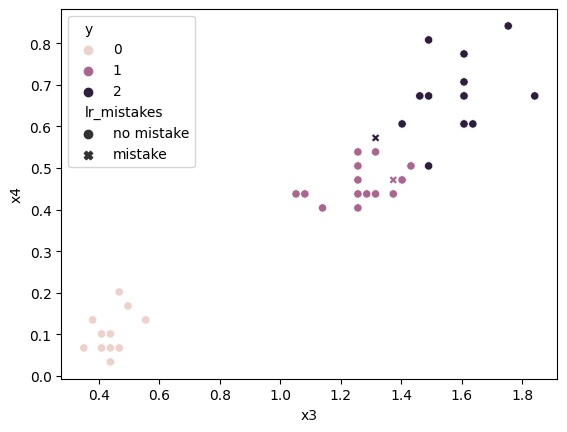

In [ ]:
sns.scatterplot(data = test, x = 'x3', y = 'x4', hue='y', style = 'lr_mistakes')

Визуализация ошибок модели (Logit), две ошибки.

Результаты немного хуже чем в lDA (модель ошиблась в двух наблюдениях)
*   Точность = accuracy = TP+TN/TP+TN+FP+FN: 95%, высокая, модель 95% дает верный результат
*   Полнота = Recall = TP/TP+FN: почти все Positive семплы классифицируются верно (видим что ошибки были только в у=2, где не был выявлен у = 2)
*   Precision = TP/TP+FP: почти все Positive семплы классифицируются верно (видим что ошибки были только в у=1, где был неверно выявлен у = 1)

*   F1 = (2 * recall * *precision)/*(*recall* + *precision*), высокая, средневзвешенное значение точности и полноты

**3. Desicion tree**


1.   Desicion tree

2.   Random Forest
3.   Bootstrap via Catboost




**Descicion tree**
1.   Dataset разделяется на подгруппы таким образом, чтобы разделение выборки на подгруппы уменьшало энтропию сильнее всего (sum(-p_i*log_p_i))
2.   max_depth подбиралось вручную, чтобы получить наименьшее количество ошибок



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
# обучение
clf.fit(train[['x1', 'x5', 'x3', 'x4']], train[['y']])
# делаем прогноз на тестовой выборке
pred = clf.predict(test[['x1', 'x5', 'x3', 'x4']])
# смотрим разницу факта и прогноза
test['tree_pred'] = pred

[Text(0.3333333333333333, 0.875, 'x[2] <= 0.716\nentropy = 1.585\nsamples = 100\nvalue = [33, 34, 33]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 1.388\nentropy = 1.0\nsamples = 67\nvalue = [0, 34, 33]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 1.476\nentropy = 0.414\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.5, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

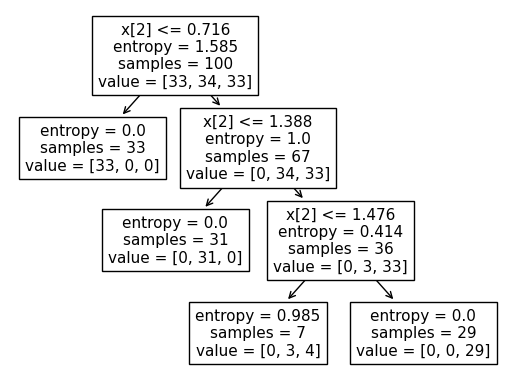

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [ ]:
#ошибки
test[test['y'] != test['tree_pred']]

,y,x1,x3,x4,x5,lda_pred,lda_mistakes,lr_pred,lr_mistakes,tree_pred
id,,,,,,,,,,
72,1,1.262417,1.431890,0.505020,1.139786,1,no mistake,1,no mistake,2
99,1,1.362609,1.402668,0.471352,1.276560,1,no mistake,1,no mistake,2
98,2,0.981880,1.315001,0.572356,1.139786,2,no mistake,1,mistake,1


<Axes: xlabel='importance', ylabel='variable'>

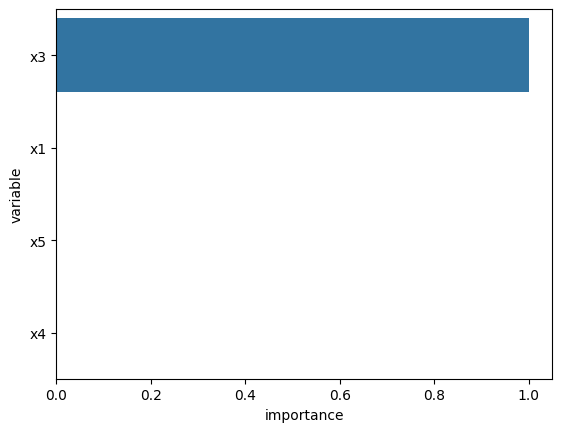

In [ ]:
feauture_imp = pd.Series(clf.feature_importances_, index = [['x1', 'x5', 'x3', 'x4']]).sort_values(ascending = False)
feauture_imp = pd.DataFrame(feauture_imp, columns = ['importance'])
feauture_imp = feauture_imp.reset_index()
feauture_imp = feauture_imp.rename(columns = {'level_0': 'variable'})
sns.barplot(data = feauture_imp, x = 'importance', y = 'variable')


*   Дерево показывает нам что главная переменная (наибольший Ingormational gain), которая показывает к какому классу будет принадлежать У - х3 (если х3 < 0.236, то У = 0);
*   Глубина дерева выбрана на уровне 3, так как при увеличении глубины - кол-во ошибок не изменятеся и остается равным 3.

**Random Forest**

1.   Для улучшения точности прогноза можно воспользоваться алгоритмом случайного леса, который использует множество подвыборок изначального датасета и последующее усреднение
2.   Метод разделения также указан - энтропия
3.   Число деревьев в лесу: 185

In [ ]:
from sklearn.ensemble import RandomForestClassifier
train, test = train_test_split(data,train_size=0.7,random_state=42,stratify=data['y'])
clf = RandomForestClassifier(criterion='entropy', n_estimators=185)
clf.fit(train[['x1','x5', 'x3', 'x4']], train[['y']])
# делаем прогноз на тестовой выборке
pred = clf.predict(test[['x1','x5', 'x3', 'x4']])
# смотрим разницу факта и прогноза
test['random_forest_pred'] = pred

<ipython-input-232-8629d68ec3fc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train[['x1','x5', 'x3', 'x4']], train[['y']])


In [ ]:
#ошибки
test[test['y'] != test['random_forest_pred']]

,y,x1,x3,x4,x5,random_forest_pred
id,,,,,,
72,1,1.262417,1.431890,0.505020,1.139786,2
98,2,0.981880,1.315001,0.572356,1.139786,1


<Axes: xlabel='importance', ylabel='variable'>

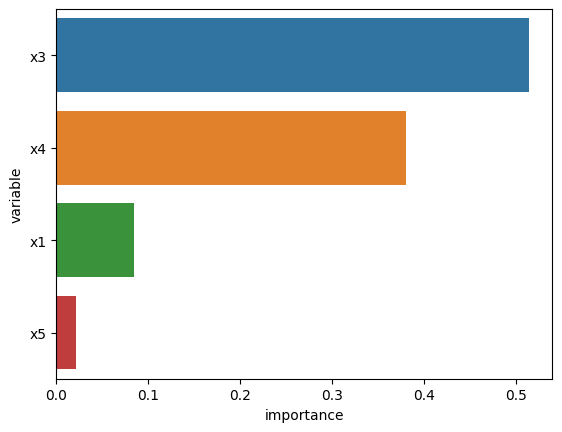

In [ ]:
feauture_imp = pd.Series(clf.feature_importances_, index = [['x1','x5','x3', 'x4']]).sort_values(ascending = False)
feauture_imp = pd.DataFrame(feauture_imp, columns = ['importance'])
feauture_imp = feauture_imp.reset_index()
feauture_imp = feauture_imp.rename(columns = {'level_0': 'variable'})
sns.barplot(data = feauture_imp, x = 'importance', y = 'variable')



**Catboost**



*   Наиболее надежной моделью для решения задачи классификации будет метод основанный на градиентном бустинге
*   Создается n деревьев, где на каждом шаге построения нового дерева модель анализирует ошибки
*   Loss функция выбрана Multiclass (а не Loglos, так как у принимает больше 2 значений)
*   Для Сatboost необходимо разделить датасет на валидационный сет (по которому будет проверяться качество модели обученной на обучающем сете): допустим 50% от тестируемого датасета.









In [ ]:
! pip install catboost
from catboost import CatBoostClassifier

In [ ]:
train, test = train_test_split(data,train_size=0.7,random_state=42,stratify=data['y'])
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['y'])


X = [ 'x1','x5', 'x3', 'x4']
y = ['y']
params = {'verbose':100,
          'random_seed':42,
          #'eval_metric':'Accuracy',
          # 'iterations': 100,
          'loss_function': 'MultiClass',
          'learning_rate':0.1}
model = CatBoostClassifier(**params)
model.fit(train[X],train[y],eval_set=(val[X],val[y]), plot=True)

print(model.get_all_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9921470	test: 1.0029356	best: 1.0029356 (0)	total: 4.1ms	remaining: 4.1s
100:	learn: 0.0437205	test: 0.1859504	best: 0.1854922 (99)	total: 47.5ms	remaining: 423ms
200:	learn: 0.0183910	test: 0.1822658	best: 0.1807717 (184)	total: 89.2ms	remaining: 355ms
300:	learn: 0.0115922	test: 0.1828408	best: 0.1807717 (184)	total: 131ms	remaining: 304ms
400:	learn: 0.0084391	test: 0.1834251	best: 0.1807717 (184)	total: 173ms	remaining: 259ms
500:	learn: 0.0066421	test: 0.1850411	best: 0.1807717 (184)	total: 223ms	remaining: 222ms
600:	learn: 0.0054858	test: 0.1869263	best: 0.1807717 (184)	total: 271ms	remaining: 180ms
700:	learn: 0.0046360	test: 0.1887031	best: 0.1807717 (184)	total: 316ms	remaining: 135ms
800:	learn: 0.0040364	test: 0.1895590	best: 0.1807717 (184)	total: 363ms	remaining: 90.2ms
900:	learn: 0.0035468	test: 0.1904923	best: 0.1807717 (184)	total: 423ms	remaining: 46.5ms
999:	learn: 0.0031827	test: 0.1915240	best: 0.1807717 (184)	total: 470ms	remaining: 0us

bestTest = 0.

In [ ]:
test['tree_boost_score'] = model.predict_proba(test[X])[:,1]
test['tree_boost_pred'] = model.predict(test[X])


In [ ]:
#ошибок нет
test[test['y'] != test['tree_boost_pred']]

,y,x1,x3,x4,x5,tree_boost_score,tree_boost_pred
id,,,,,,,


In [ ]:
#посмотрим на значимость переменных (х3 - наиболее значимая)
model.get_feature_importance(prettified=True)


,Feature Id,Importances
0,x3,54.460454
1,x4,29.446157
2,x5,10.407543
3,x1,5.685846


Визуализация значимости переменных: в разрезе по классам зависимой переменной

In [ ]:
! pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.0 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

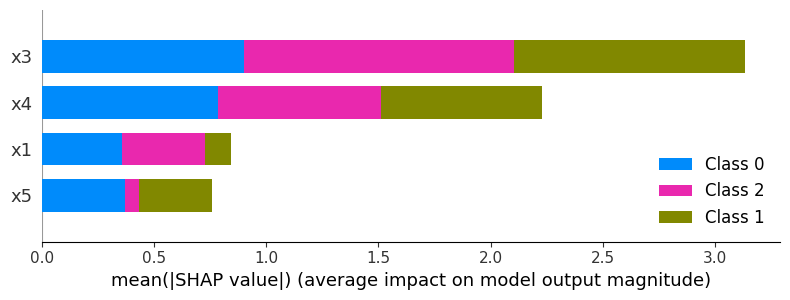

In [ ]:
shap.summary_plot(shap_values, test[X])


In [ ]:
print('Всего построенно деревьев:', model.tree_count_)


Всего построенно деревьев: 185


In [ ]:
print(classification_report(test['y'],test['tree_boost_pred']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



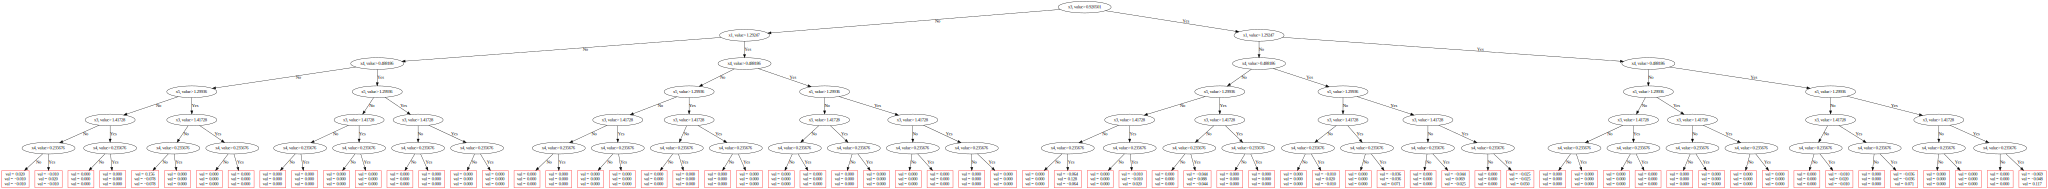

In [ ]:
from catboost import Pool
train_data = Pool(data=train[X],
                  label=train[y],
                  #cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                 # cat_features=cat_features
                 )

model.plot_tree(
    tree_idx=0,
    pool=train_data
)




---



*   Catboost дал наилучший результат, так как не было допущено ни одной ошибки
*   Всего было построено 185 деревьев, во время градиентного бустинга
*   Как и в других моделях наиболее важная переменная - х3 (дерево начинается именно с этой переменной x3 vs 0.92)











Итог:


1.   Catboost (100% точность)
2.   lDA (98% точность)
3.   logit (95% точность)


